<a href="https://colab.research.google.com/github/JamieHolloway/ArduinoRGBmatrix/blob/master/Copy_of_BirdClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIRD identification model

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from keras.preprocessing import image  
from tensorflow.keras import layers

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Transform images

In [ ]:
IMAGE_RES = 224                                                                 # input dimensions required by the CNN model
def preprocess_image_to_tensor(img_path, ax):
    img = image.load_img(img_path, target_size=(IMAGE_RES, IMAGE_RES))          # loads RGB image as PIL.Image.Image type, resize image to model input dimensions
    ax.imshow(img, alpha=1)
    x = image.img_to_array(img)/255.0                                           # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3) and normalize to [0:1] as per model requierements
    x = np.expand_dims(x, axis=0)                                               # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return x                                                                    # return 4D tensor

## Load and assemble pretrained model

https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1

In [ ]:
URL = 'https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1'               # Import pre-trained bird classification model from Tensorflow Hub 
bird = hub.KerasLayer(URL, input_shape=(IMAGE_RES,IMAGE_RES,3))                 # Using aiy/vision/classifier/birds_V1 classifying 964 bird species from images. It is based on MobileNet, and trained on photos contributed by the iNaturalist community
bird.trainable=False                                                            # freeze model weights

In [ ]:
model=tf.keras.Sequential([bird])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 965)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


## Load labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 BirdClassifier.ipynb
 Bird_Classifier_Tensorflow_Colab_Notebook
'Copy of Welcome To Colaboratory'
'GAN1 -- StyleGAN_Encoder.ipynb'
'GAN2 -- Face_Editing.ipynb'
'Linear Regression with a Real Dataset (1).ipynb'
'Linear Regression with a Real Dataset.ipynb'
'Linear Regression with Synthetic Data.ipynb'
 NumPy
'Pandas DataFrame.ipynb'


In [ ]:
#labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/aiy_birds_V1_labelmap.csv", sep=',', header=0, index_col=0)  # using scientific names  in Latin
#labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/labels_oiseaux.csv", sep=';', header=0, index_col=0)          # file providing species in french, english and latin
labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bird_Classifier_Tensorflow_Colab_Notebook/labels_oiseaux.csv")
labels.head()

,id,nom,name
0,0,Roselin de Cassin,Cassin's Finch
1,1,Courlan brun,Limpkin
2,2,Rupornis magnirostris,Rupornis magnirostris
3,3,Geai bleu,Blue Jay
4,4,Geai de Steller,Steller's Jay


## Run prediction

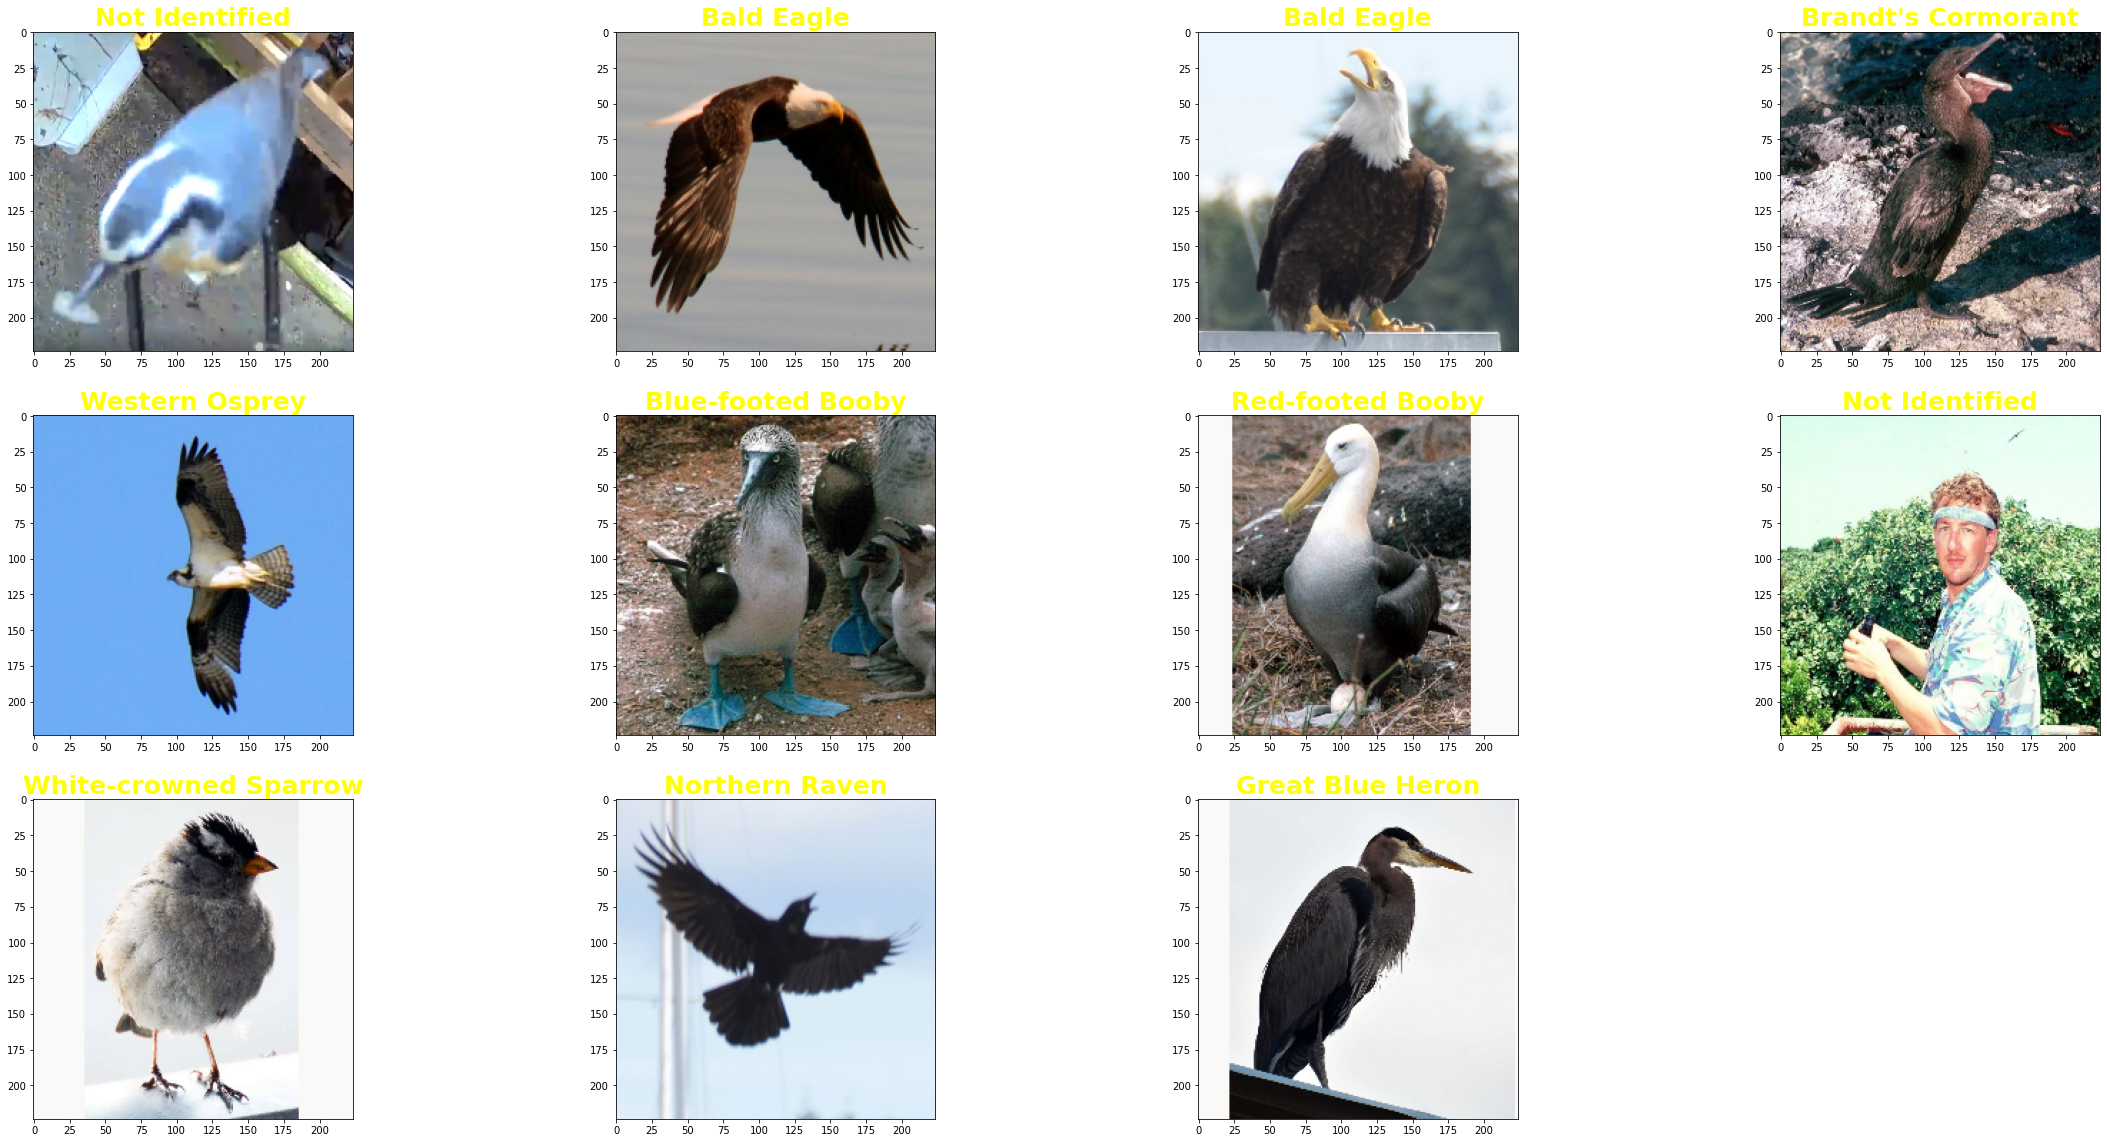

In [ ]:
lang='en'                                                                       # select 'fr' for species in french, 'en' for english labels
if lang=='fr':
  label='nom'
else:
  label='name'

cols = 4

my_files = np.array(glob("/content/drive/My Drive/Colab Notebooks/Bird_Classifier_Tensorflow_Colab_Notebook/images/*"))   # collect all images to be analyzed
num_img=my_files.shape[0]
lines= num_img//cols + 1
columns=np.minimum(cols,num_img)
# plt.figure(figsize=(30,15))
plt.figure(figsize=(40,20))
for index, file in enumerate(my_files):
  ax=plt.subplot(lines, columns,index+1)
  processed_image=preprocess_image_to_tensor(file, ax)                          # preprocess image before feeding to classifier
  output = model.predict(processed_image)                                       # get prediction
  prediction = np.argmax(tf.squeeze(output).numpy())
  plt.title(labels[label][prediction], fontsize=25, color= 'yellow', fontweight='bold')
plt.show()